# Large Figure for Time Breakdown (Metadata Time & Data Time Only)

Index(['D(ns)', 'JM(ns)', 'JC(ns)', 'M(ns)'], dtype='object')
41014375031
24416809284
33684329254
35573759040
44186012732
39399444076
Index(['D(ns)', 'JM|JC(ns)', 'M(ns)'], dtype='object')
52493636000
50056200000
46082737000
55945531000
38209000000
29432795000
Index(['D(ns)', 'JM(ns)', 'JC(ns)', 'GC(ns)'], dtype='object')
31624613256
23940865119
27011784601
36392994456
45599658762
42375228559
6


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


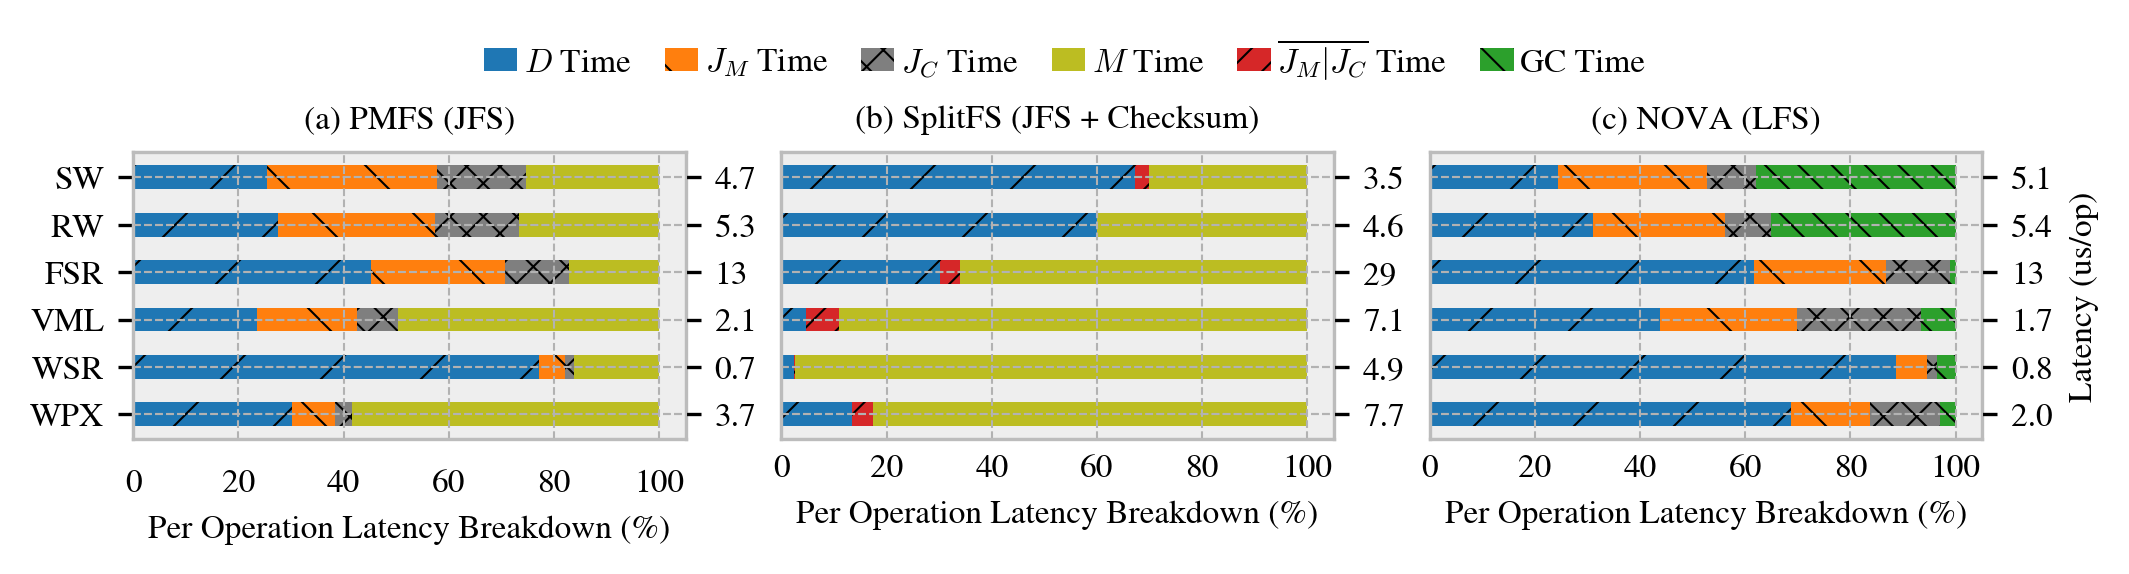

In [92]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

plt.rcParams.update(plt.rcParamsDefault)
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.5
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
colors = [["rgb(238,238,238)", "rgb(21,78,86)", "rgb(126,232,192)", "rgb(29,138,32)", "rgb(140,202,76)", "rgb(44,146,139)"]]
patterns = ['/', '\\', 'XXX', "", "///", "\\\\\\", "xxx", '/', '\\', 'XXX', "", "///", "\\\\\\", "xxx"]
# titles = ["(a) NOVA I/O Time (Seconds) and I/O Size (Gigabytes) Breakdown", "(b) PMFS I/O Time (Seconds) and I/O Size (Gigabytes) Breakdown"]
titles = ["(a) PMFS (JFS)", "(b) SplitFS (JFS + Checksum)", "(c) NOVA (LFS)"]
scales = [4, 1]
cmap="tab10"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-PMFS", "./performance-comparison-table-SplitFS", "./performance-comparison-table-NOVA" ] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW","FSR", "VML", "WSR", "WPX"]

workloads.reverse()
workloads_remap.reverse()

breakdown_times = ["data_read_time(ns)", "data_write_time(ns)", "update_entry_time(ns)", "update_inode_time(ns)", "journal_time(ns)", "update_page_tail_time(ns)"]
breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)", "media_read(byte)", "media_write(byte)"]
ops = [
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47205 * 60, 268363 * 60, 558425 * 60, 183316 * 60], # PMFS
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 31838 * 60, 107583 * 60, 171224 * 60, 113574 * 60], # SplitFS
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47087 * 60, 264382 * 60, 502315 * 60, 263680 * 60], # NOVA
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 79240 * 60, 437532 * 60, 580830 * 60, 344069 * 60], # KILLER
]

for op in ops:
    op.reverse()
    
bars = [None, None, None, None, None, None]
global_color_idx = 0
color_map = {
    "D(ns)": 0,
    "JM(ns)": 1,
    "JC(ns)": 7,
    "M(ns)": 8,
    "JM|JC(ns)": 3,
    "GC(ns)": 2,
}
bar_map = {
    "D(ns)": 0,
    "JM(ns)": 1,
    "JC(ns)": 2,
    "M(ns)": 3,
    "JM|JC(ns)": 4,
    "GC(ns)": 5,
}
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    # breakdown_times = ["data_time(ns)", "meta_time(ns)"]
    # breakdown_times = df.columns[14:]
    # breakdown_times = breakdown_times.insert(0, "data_read_time(ns)")
    # breakdown_times = breakdown_times.insert(1, "data_write_time(ns)")

    # for workload_id, workload in enumerate(workloads):
    #     _sum = 0
    #     for idx, time in enumerate(breakdown_times):
    #         if idx == 0 or idx == 1:
    #             _sum += df.loc[df['workloads'] == workload, time]
    #             if idx == 1:
    #                 df.loc[df['workloads'] == workload, "data_time(ns)"] = _sum
    #                 _sum = 0
    #         else:
    #             _sum += df.loc[df['workloads'] == workload, time]
    #             df.loc[df['workloads'] == workload, "meta_time(ns)"] = _sum
    
    # breakdown_times = ["data_time(ns)", "meta_time(ns)"]
    breakdown_times = df.columns[1:]

    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    
    subfig = plt.subplot(1, 3, fid + 1)
    ax2 = subfig.twinx()
    
    abs_times = []
    for workload_id, workload in enumerate(workloads):
        # global_color_idx = 0
        global_color_idx = fid * len(breakdown_times) 
        left = 0
        pivot = x[workload_id]
        inner_left = 0
        inner_left_range = []
        start = False
        
        time_sum = 0
        for idx, time in enumerate(breakdown_times):
            time_sum += df[(df['workloads'] == workload)][time].iloc[0]
        abs_times.append(time_sum / 1000 / ops[fid][workload_id])
        print(time_sum)
        for idx, time in enumerate(breakdown_times):
            width = df[(df['workloads'] == workload)][time].iloc[0] / time_sum
            
            orig_global_color_idx = global_color_idx
            # if fid == 1 and idx in [0, 1, 3, 4]:
            #     global_color_idx = color_map[time]
            color_idx = color_map[time]
            bar_idx = bar_map[time]
            bar, = subfig.barh(y=pivot, width=width, color=plt.get_cmap(cmap)(color_idx), left=left, height=bar_width, hatch=patterns[bar_idx],linewidth=0.5, label=time)
            left = left + width 
            
            global_color_idx = orig_global_color_idx
            
            if bars[bar_idx] is None:
                bars[bar_idx] = bar
                
    subfig.set_xlabel("Per Operation Latency Breakdown (%)", fontsize=8)
    xticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    subfig.set_xticks(xticks)
    subfig.set_xticklabels([ round(xtick * 100) for xtick in xticks], fontsize=8)
    
    subfig.set_yticks(x)
    if fid == 0:
        subfig.tick_params(which='major', direction='out')
        subfig.set_yticklabels(workloads_remap, fontsize=8)
        subfig.tick_params(bottom=False, top=False, left=True, right=False)
    else:
        subfig.set_yticklabels([], fontsize=8)
        subfig.tick_params(bottom=False, top=False, left=False, right=False)
        
    ylim = subfig.get_ylim()
    
    ax2.set_yticks(x)
    ax2.set_yticklabels([round(abs_time) if abs_time > 10 else round(abs_time, 1) for abs_time in abs_times], fontsize=8)
    ax2.set_ylim(ylim)
    ax2.tick_params(which='major', direction='out')
    ax2.tick_params(bottom=False, top=False, left=False, right=True)
    
    if fid == 2:
        ax2.set_ylabel("Latency (us/op)", fontsize=8)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    plt.title(titles[fid], fontsize=8)

    # subfig.title.set_text(titles[fid], fontsize=8)
print(len(bars))
# legends = ["T-D-Rd", "T-D-Wr", "T-M-E", "T-M-I", "T-M-Jnl", "T-M-T", "T-M-Idx", "T-M-DE", "IO-D", "IO-M" ]
legends = ["$D$ Time", "$J_M$ Time", "$J_C$ Time", "$M$ Time", "$\overline{J_M|J_C}$ Time", "GC Time" ]
fig.legend(handles=bars, labels=legends, loc='upper center', ncol=len(bars), bbox_to_anchor=(0.5, 1.16), frameon=False, columnspacing=1, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout(pad=0.4)
plt.savefig("./FIG-MetaObservation.pdf", bbox_inches='tight', pad_inches=0)


# KILLER-Study-Data&Medadata

['data_time(ns)', 'meta_time(ns)']
22.799234919
7.920126294
23.372740155
0.57234378
12.179719432
13.311784309
29.838387238
10.826879677
11.386235822
10.062411429
6.575383383
3.341258403
4


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


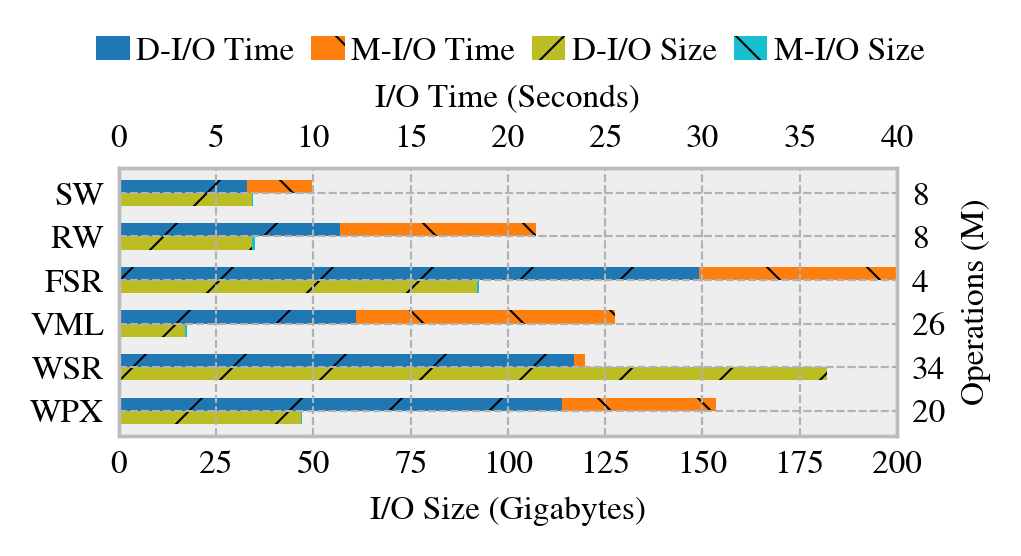

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

ops = [
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47087 * 60, 264382 * 60, 502315 * 60, 263680 * 60],
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47205 * 60, 268363 * 60, 558425 * 60, 183316 * 60],
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 79240 * 60, 437532 * 60, 580830 * 60, 344069 * 60]
]
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4.5)))
bar_width = 0.3
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) NOVA I/O Time and I/O Size Breakdown", "(b) PMFS I/O Time and I/O Size Breakdown"]
scales = [4, 1]
cmap="tab10"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-KILLER"] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW","FSR", "VML", "WSR", "WPX"]

workloads.reverse()
workloads_remap.reverse()

breakdown_times = ["data_read_time(ns)", "data_write_time(ns)", "update_entry_time(ns)", "update_inode_time(ns)", "journal_time(ns)", "update_page_tail_time(ns)"]
breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)", "media_read(byte)", "media_write(byte)"]
bars = []
global_color_idx = 0
color_map = {}
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    breakdown_times = ["data_time(ns)", "meta_time(ns)"]
    # df.columns[14:]
    # breakdown_times = breakdown_times.insert(0, "data_read_time(ns)")
    # breakdown_times = breakdown_times.insert(1, "data_write_time(ns)")
    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    
    ax2 = plt.subplot(1, 1, fid + 1)
    subfig = ax2.twiny()
    ax3 = ax2.twinx()
    
    for workload_id, workload in enumerate(workloads):
        # global_color_idx = 0
        global_color_idx = fid * len(breakdown_times) 
        left = 0
        pivot = x[workload_id] + bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        for idx, time in enumerate(breakdown_times):
            width = df[(df['workloads'] == workload)][time].iloc[0] / 1000000000
            
            orig_global_color_idx = global_color_idx
            if fid == 1 and idx in [0, 1, 3, 4]:
                global_color_idx = color_map[time]
            print(width)
            bar, = subfig.barh(y=pivot, width=width, color=plt.get_cmap(cmap)(global_color_idx), left=left, height=bar_width, hatch=patterns[idx],linewidth=0.5, label=time)
            left = left + width 
            
            global_color_idx = orig_global_color_idx

            if fid == 0:
                color_map[time] = global_color_idx
                global_color_idx += 1
                if workload_id == 0:
                    bars.append(bar)
            else:
                if idx not in [0, 1, 3, 4]:
                    global_color_idx += 1
                if workload_id == 0:
                    if idx not in [0, 1, 3, 4]:
                        bars.append(bar)
                
    subfig.set_xlabel("I/O Time (Seconds)", fontsize=8)
    if fid == 0:
        subfig.set_xlim([0, 40])
        subfig.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
        subfig.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=8)
    else:
        subfig.set_xticks([0, 11, 22, 33, 44])
        subfig.set_xticklabels([0, 11, 22, 33, 44], fontsize=8)
    
    subfig.set_yticks(x)
    if fid == 0:
        subfig.set_yticklabels(workloads_remap, fontsize=8)
        ax2.set_yticklabels(workloads_remap, fontsize=8)
    else:
        subfig.set_yticklabels([], fontsize=8)

    subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    
    # plt.yticks(x, labels=workloads_remap, fontsize=8)
    # subfig = plt.subplot(2, 2, fid * len(files) + 2)
   
    for workload_id, workload in enumerate(workloads):
        left = 0
        pivot = x[workload_id] - bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        merged_breakdown_IO = []
        width = 0
        for idx, IO in enumerate(breakdown_IO):
            width += df[(df['workloads'] == workload)][IO].iloc[0] / 1000000000
            if idx == 1 or idx == 3:
                merged_breakdown_IO.append(width)
                width = 0
        
        for idx, IO in enumerate(merged_breakdown_IO):
            bar, = ax2.barh(y=pivot, width=IO, color=plt.get_cmap(cmap)(8 + idx), left=left, height=bar_width, hatch=patterns[idx],linewidth=0.5, label="D-IO" if idx == 0 else "M-IO")
            left = left + IO
            if workload_id == 0:
                bars.append(bar)
    
    ax2.set_xticks([0, 25, 50, 75, 100, 125, 150, 175, 200])
    ax2.set_xticklabels([0, 25, 50, 75, 100, 125, 150, 175, 200], fontsize=8)
    # if fid == 1:
    ax2.set_xlabel("I/O Size (Gigabytes)", fontsize=8)
    
    # plt.yticks(x, labels=[], fontsize=8)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    ax2.tick_params(bottom=False, top=False, left=False, right=False)

    ax3.set_ylim(subfig.get_ylim())
    ax3.set_yticks(x)
    op = ops[2]
    op.reverse()
    # ax3.set_yticklabels([str(int(i / 1000000)) + " MOps" if i_idx != 4 and i_idx != 5 else str(int(i / 1000)) + " KOps" for i_idx, i in enumerate(op)], fontsize=7, ha="right", va = "center")
    # # print(subfig.get_yaxis().get_tick_padding())
    # ax3.get_yaxis().set_tick_params(pad=30)
    ax3.set_yticklabels([str(int(i / 1000000)) for i_idx, i in enumerate(op)], fontsize=8)
    # if fid == :
    ax3.set_ylabel("Operations (M)", fontsize=8)
    ax3.tick_params(bottom=False, top=False, left=False, right=False)

    # plt.title(titles[fid], fontsize=8)


    # subfig.title.set_text(titles[fid], fontsize=8)
print(len(bars))
# legends = ["T-D-Rd", "T-D-Wr", "T-M-E", "T-M-I", "T-M-Jnl", "T-M-T", "T-M-Idx", "T-M-DE", "IO-D", "IO-M" ]
legends = ["D-I/O Time", "M-I/O Time", "D-I/O Size", "M-I/O Size" ]
fig.legend(handles=bars, labels=legends, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-KILLERStudy.pdf", bbox_inches='tight', pad_inches=0)


# KILLER

Index(['D(ns)', 'JM|JC(ns)', 'M(ns)'], dtype='object')
30719361213
23945083935
25491503741
40665266915
25727480577
9916641786
3


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


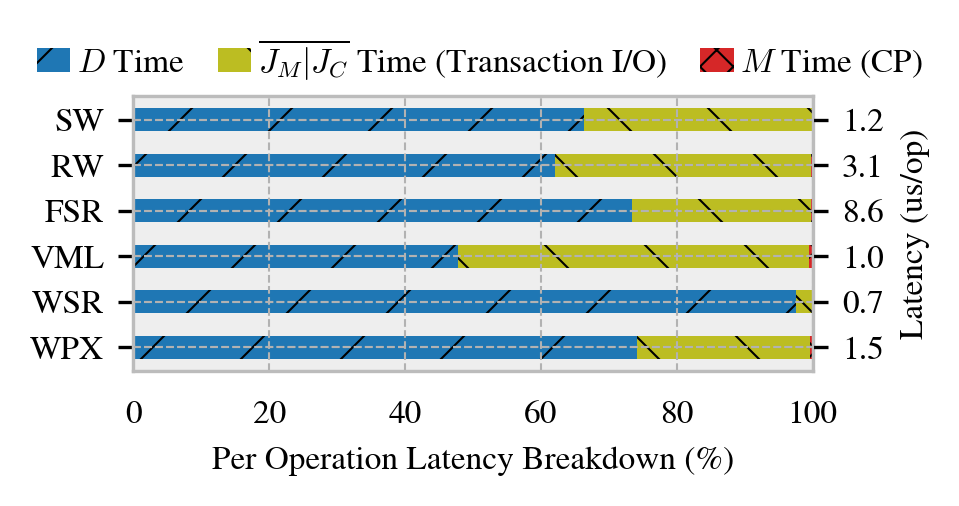

In [28]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

plt.rcParams.update(plt.rcParamsDefault)
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH -1), cm_to_inch(3.5)))
bar_width = 0.5
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
patterns = ['/', '\\', 'XXX', "", "///", "\\\\\\", "xxx", '/', '\\', 'XXX', "", "///", "\\\\\\", "xxx"]
# titles = ["(a) NOVA I/O Time (Seconds) and I/O Size (Gigabytes) Breakdown", "(b) PMFS I/O Time (Seconds) and I/O Size (Gigabytes) Breakdown"]
# titles = ["(a) PMFS (JFS)", "(b) SplitFS (JFS + Checksum)", "(c) NOVA (LFS)"]
scales = [4, 1]
cmap="tab10"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-KILLER" ] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW","FSR", "VML", "WSR", "WPX"]

workloads.reverse()
workloads_remap.reverse()

breakdown_times = ["data_read_time(ns)", "data_write_time(ns)", "update_entry_time(ns)", "update_inode_time(ns)", "journal_time(ns)", "update_page_tail_time(ns)"]
breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)", "media_read(byte)", "media_write(byte)"]
ops = [
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 79240 * 60, 437532 * 60, 580830 * 60, 344069 * 60], # KILLER
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47205 * 60, 268363 * 60, 558425 * 60, 183316 * 60], # PMFS
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 31838 * 60, 107583 * 60, 171224 * 60, 113574 * 60], # SplitFS
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47087 * 60, 264382 * 60, 502315 * 60, 263680 * 60], # NOVA
]

for op in ops:
    op.reverse()
    
bars = [None, None, None]
global_color_idx = 0
color_map = {
    "D(ns)": 0,
    "M(ns)": 3,
    "JM|JC(ns)": 8,
}
bar_map = {
    "D(ns)": 0,
    "JM|JC(ns)": 1,
    "M(ns)": 2,
}
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    breakdown_times = df.columns[1:]

    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    
    subfig = plt.subplot(1, 1, fid + 1)
    ax2 = subfig.twinx()
    
    abs_times = []
    for workload_id, workload in enumerate(workloads):
        # global_color_idx = 0
        global_color_idx = fid * len(breakdown_times) 
        left = 0
        pivot = x[workload_id]
        inner_left = 0
        inner_left_range = []
        start = False
        
        time_sum = 0
        for idx, time in enumerate(breakdown_times):
            time_sum += df[(df['workloads'] == workload)][time].iloc[0]
        abs_times.append(time_sum / 1000 / ops[fid][workload_id])
        print(time_sum)
        for idx, time in enumerate(breakdown_times):
            width = df[(df['workloads'] == workload)][time].iloc[0] / time_sum
            
            orig_global_color_idx = global_color_idx
            # if fid == 1 and idx in [0, 1, 3, 4]:
            #     global_color_idx = color_map[time]
            color_idx = color_map[time]
            bar_idx = bar_map[time]
            bar, = subfig.barh(y=pivot, width=width, color=plt.get_cmap(cmap)(color_idx), left=left, height=bar_width, hatch=patterns[bar_idx],linewidth=0.5, label=time)
            left = left + width 
            
            global_color_idx = orig_global_color_idx
            
            if bars[bar_idx] is None:
                bars[bar_idx] = bar
                
    subfig.set_xlabel("Per Operation Latency Breakdown (%)", fontsize=8)
    xticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    subfig.set_xticks(xticks)
    subfig.set_xticklabels([ round(xtick * 100) for xtick in xticks], fontsize=8)
    
    subfig.set_yticks(x)
    if fid == 0:
        subfig.tick_params(which='major', direction='out')
        subfig.set_yticklabels(workloads_remap, fontsize=8)
        subfig.tick_params(bottom=False, top=False, left=True, right=False)
    else:
        subfig.set_yticklabels([], fontsize=8)
        subfig.tick_params(bottom=False, top=False, left=False, right=False)
        
    ylim = subfig.get_ylim()
    
    ax2.set_yticks(x)
    ax2.set_yticklabels([round(abs_time) if abs_time > 10 else round(abs_time, 1) for abs_time in abs_times], fontsize=8)
    ax2.set_ylim(ylim)
    ax2.tick_params(which='major', direction='out')
    ax2.tick_params(bottom=False, top=False, left=False, right=True)
    
    # if fid == 2:
    ax2.set_ylabel("Latency (us/op)", fontsize=8)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    # plt.title(titles[fid], fontsize=8)

    # subfig.title.set_text(titles[fid], fontsize=8)
print(len(bars))
# legends = ["T-D-Rd", "T-D-Wr", "T-M-E", "T-M-I", "T-M-Jnl", "T-M-T", "T-M-Idx", "T-M-DE", "IO-D", "IO-M" ]
legends = ["$D$ Time", "$\overline{J_M|J_C}$ Time (Transaction I/O)", "$M$ Time (CP)"]
fig.legend(handles=bars, labels=legends, loc='upper center', ncol=len(bars), bbox_to_anchor=(0.5, 1.16), frameon=False, columnspacing=1, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout(pad=0.4)
plt.savefig("./FIG-KILLERStudy.pdf", bbox_inches='tight', pad_inches=0)
plt.show()
